In [1]:
import scipy.stats
import discohisto
import discohisto.stats
import lebesgue
import numpy
from matplotlib import pyplot

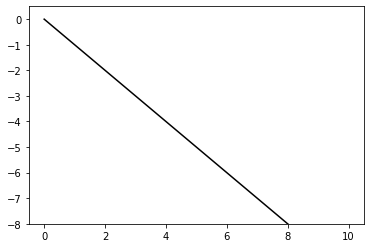

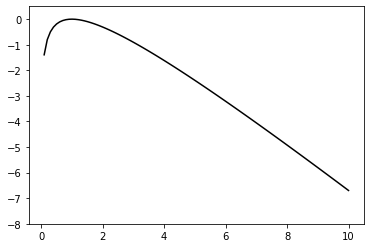

In [2]:
def plot_poisson(n):
    x = numpy.linspace(0, 10, 100)
    y = discohisto.stats.poisson_log_minus_max(n, x)
    pyplot.plot(x, y, "k")
    pyplot.ylim(-8, 0.5)
    pyplot.show()
    
plot_poisson(0)
plot_poisson(1)

In [3]:
# https://ui.adsabs.harvard.edu/abs/1998PhRvD..57.3873F/abstract
# Table VI
FENDMAN_COUSINS_POISSON_95 = [
    (0.00, 3.09),
    (0.05, 5.14), 
    (0.36, 6.72),
    (0.82, 8.25),
    (1.37, 9.76),
    (1.84, 11.26),
    (2.21,12.75),
    (2.58,13.81),
    (2.94,15.29),
    (4.36,16.77),
    (4.75,17.82),
    (5.14,19.29),
    (6.32,20.34),
    (6.72,21.80),
    (7.84,22.94),
    (8.25,24.31),
    (9.34,25.40),
    (9.76,26.81),
    (10.84,27.84),
    (11.26,29.31),
    (12.33,30.33),
]


def feldman_cousins_poisson_95(n):
    assert n == int(n)
    return FENDMAN_COUSINS_POISSON_95[int(n)]

In [4]:
def poisson_uniform_prior_central_interval(n, level):
    posterior = scipy.stats.gamma(n + 1)
    return posterior.ppf([0.5 * level, 1 - 0.5 * level])

0.025317807984289876 3.6888794541139354


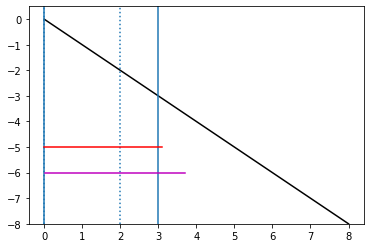

2.2018942534908508 11.66833207932267


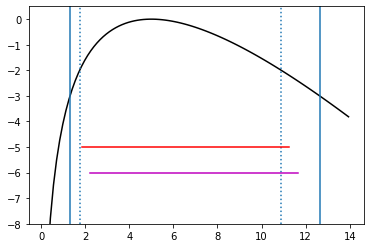

In [5]:
def plot_poisson_interval(n):
    level = 0.05
    
    x = numpy.linspace(0, max(8, n + 4 * n ** 0.5), 100)
    y = discohisto.stats.poisson_log_minus_max(n, x)
    pyplot.plot(x, y, "k")
    
    # likelihood interval (yes e**-3 != 0.05, but it's close enough)
    lo, hi = lebesgue.likelihood.poisson(n).interval(numpy.exp(-3))
    pyplot.axvline(lo)
    pyplot.axvline(hi)
    
    # another at -2
    lo, hi = lebesgue.likelihood.poisson(n).interval(numpy.exp(-2))
    pyplot.axvline(lo, ls=":")
    pyplot.axvline(hi, ls=":")
    
    # Feldman-Cousins (constrained maximum likelihood ratio test statistic)
    lo, hi = feldman_cousins_poisson_95(n)
    pyplot.plot([lo, hi], [-5] * 2, "r")
    
    # Posterior with improper uniform prior
    lo, hi = poisson_uniform_prior_central_interval(n, level)
    print(lo, hi)
    pyplot.plot([lo, hi], [-6] * 2, "m")
    
    
    pyplot.ylim(-8, 0.5)
    pyplot.show()
    
plot_poisson_interval(0)
plot_poisson_interval(5)

In [6]:
# green yellow orange red tasty colours yo